In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import scipy.io
basins = scipy.io.loadmat('data/inputs/bsn_boundary.mat', simplify_cells=True, squeeze_me=True)['bsn_only']

In [3]:
import sectionate as sec
import regionate as reg

# Modification of Purkey's basin boundaries to achieve *global* and *unique* coverage by topographic basins

In [64]:
basins_dict = {
    str(basin['bsn_num'].replace("_", "")):
    reg.Basin(np.round(basin['bsn'][0]*8, 0)/8., np.round(basin['bsn'][1]*8, 0)/8., str(basin['bsn_num'].replace("_", "")), force_ccw=True, remove_duplicate_points=True)
    for basin in basins
}
region = reg.Region(basins_dict)
region.find_all_overlaps()
reg.align_boundaries_with_overlap_sections(region)
region.find_all_overlaps()

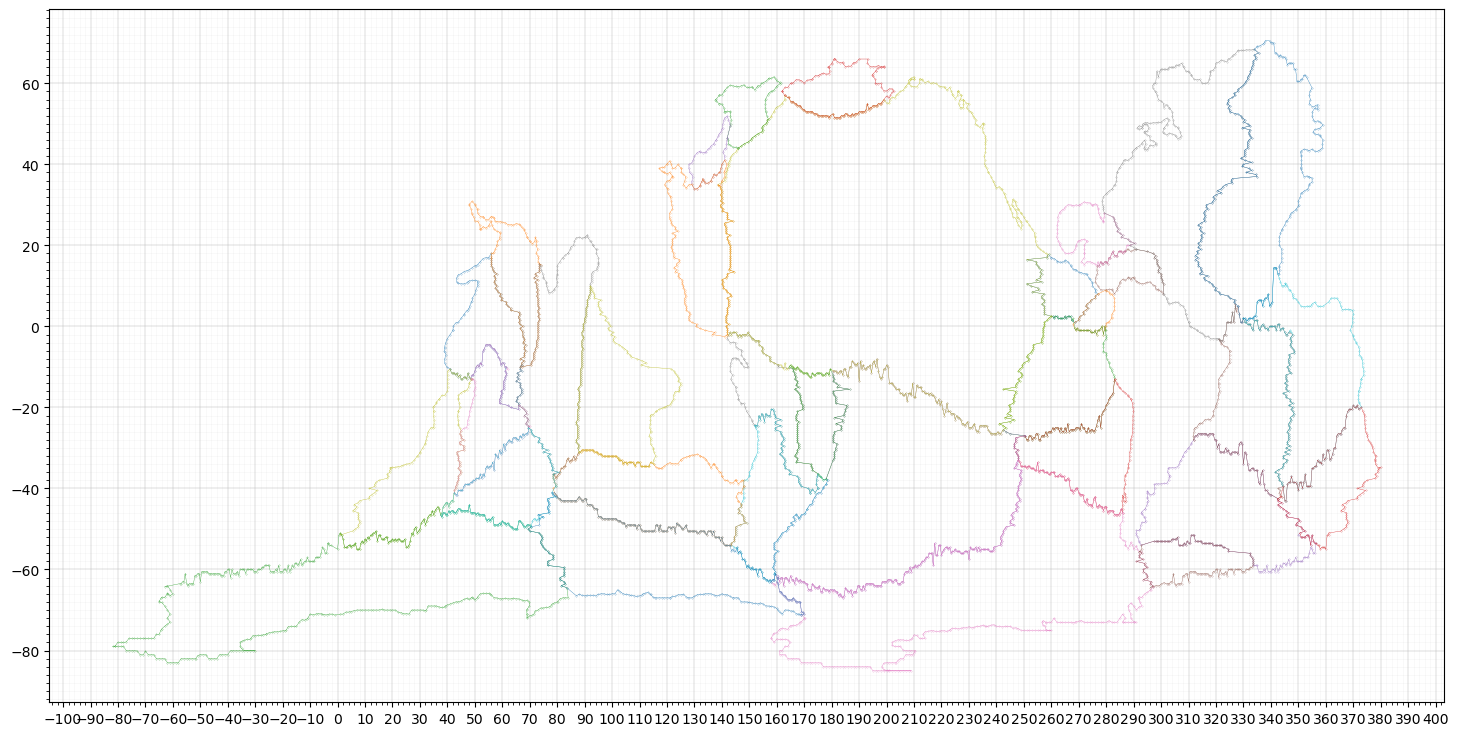

In [65]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(18, 9))
ax = plt.subplot()
for b in region.Basins.values():
    plt.plot(np.append(b.lons, b.lons[0]), np.append(b.lats, b.lats[0]), ".-", markersize=0.3, lw=0.25)
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(20))
plt.grid(True, alpha=0.25, which="major", lw=1.2)
plt.grid(True, alpha=0.1, which="minor", lw=0.5)

### Remove, move, or group and average problematic points

In [66]:
# Points that can just be removed without affecting nearby boundaries
remove_points = [
    (-63, -64.2),
    (-55.5, -61.),
    (-5.5, -54.),
    (1, -51.5),
    (38, -46),
    (62, -10.5),
    (70, -24.55),
    (78.5, -41.5),
    (79.5, -42.),
    (80.5, -36.),
    (102.5, -32.5),
    (117, -50),
    (145.5, -54.5),
    (145.5, -55.5),
    (152, -24.5),
    (180.5, -65.5),
    (239, -55.5),
    (247, -34),
    (296, -64.5),
    (268, 0.5),
    (280, -1),
    (277, 16),
    (280, 9.05),
    (280, 8.75),
    (350, -51.5),
    (321, -3.05),
    (347, -1),
    (347.5, -1.5),
    (345, 10.55),
    (328, 52.5),
    (298, -65.8)
]

In [67]:
for (lon, lat) in remove_points:
    for b in region.Basins.values():
        idx = reg.haversine(b.lons, b.lats, lon, lat) < 10e3
        if np.any(idx):
            b.lons = b.lons[~idx]
            b.lats = b.lats[~idx]
            print(f"Removed problematic point {(lon, lat)} from basin {b.name}")

Removed problematic point (-63, -64.2) from basin 16
Removed problematic point (-63, -64.2) from basin 30
Removed problematic point (-63, -64.2) from basin 33
Removed problematic point (-55.5, -61.0) from basin 30
Removed problematic point (-55.5, -61.0) from basin 33
Removed problematic point (-5.5, -54.0) from basin 23
Removed problematic point (-5.5, -54.0) from basin 31
Removed problematic point (1, -51.5) from basin 27
Removed problematic point (1, -51.5) from basin 31
Removed problematic point (38, -46) from basin 27
Removed problematic point (38, -46) from basin 6
Removed problematic point (62, -10.5) from basin 3
Removed problematic point (70, -24.55) from basin 3
Removed problematic point (78.5, -41.5) from basin 6
Removed problematic point (78.5, -41.5) from basin 7
Removed problematic point (79.5, -42.0) from basin 6
Removed problematic point (79.5, -42.0) from basin 7
Removed problematic point (80.5, -36.0) from basin 4
Removed problematic point (80.5, -36.0) from basin 6
R

In [68]:
move_points = {
    (78.5, -40): (78, -41),
    (67, -10): (66.5, -10),
    (179.5, -10.5): (180.5, -11),
    (268, 2): (268.5, 1)
}

In [69]:
for ((lon1, lat1), (lon2, lat2)) in move_points.items():
    for b in region.Basins.values():
        idx = reg.haversine(b.lons, b.lats, lon1, lat1) < 10e3
        if np.any(idx):
            b.lons[idx] = reg.lon_mod(lon2, b.lons[idx])
            b.lats[idx] = lat2
            print(f"Moved problematic point {(lon1, lat1)} from basin {b.name} to {(lon2, lat2)}.")

Moved problematic point (78.5, -40) from basin 20 to (78, -41).
Moved problematic point (67, -10) from basin 2 to (66.5, -10).
Moved problematic point (67, -10) from basin 4 to (66.5, -10).
Moved problematic point (179.5, -10.5) from basin 18 to (180.5, -11).
Moved problematic point (179.5, -10.5) from basin 9 to (180.5, -11).
Moved problematic point (268, 2) from basin 12 to (268.5, 1).


In [70]:
average_rects = [
[-70, -65, -56, -51],
[-65, -55, -65, -63],
[-5, 0, -56, -52],
[18, 21, -38, -34],
[20, 22, -36, -34],
[47, 50, -14, -11],
[66, 68, -11, -9],
[69, 75, -50, -47],
[73, 75, 14, 16],
[132, 135, 34, 37],
[138, 141, 34, 38],
[139, 146, 35, 46.5],
[141, 143, -3, -1],
[143, 146, -56, -54],
[158, 161, -64, -61],
[160, 167, -11, -9],
[169, 171, -72, -70],
[197, 200, 63, 65],
[198, 202, 55, 57],
[207, 211, 59, 63],
[226, 227, 58, 59],
[247, 249, -34, -32],
[245, 251, -29, -26],
[278, 281, -3, 1],
[287, 291, 18, 20],
[320, 322, -4, -3],
[326, 328, 1, 7],
[342, 345, -43, -39],
[372, 374, -21, -19], 
[379, 382, -36, -33],
]

In [71]:
new_region = region.copy()

δ = 0.05
for (lon_min, lon_max, lat_min, lat_max) in average_rects:
    points_idx = {}
    lons = np.array([])
    lats = np.array([])
    for b in region.Basins.values():
        points_idx[b.name] = (reg.lon_mod(lon_min, np.mean(b.lons))-δ <= b.lons) & (b.lons <= reg.lon_mod(lon_max, np.mean(b.lons))+δ) & (lat_min-δ <= b.lats) & (b.lats <= lat_max+δ)
        lons = np.append(lons, b.lons[points_idx[b.name]])
        lats = np.append(lats, b.lats[points_idx[b.name]])
    
    unique_lons, unique_lats = reg.unique_lonlat(lons, lats)
            
    for new_b in new_region.Basins.values():
        if new_b.name not in points_idx.keys(): continue
        i = np.where( points_idx[new_b.name] )[0]
        if np.any(i):
            new_b.lons[i[0]] = reg.lon_mod(np.mean(reg.lon_mod(unique_lons, np.mean(new_b.lons))), np.mean(new_b.lons))
            new_b.lats[i[0]] = np.mean(unique_lats)
        
            new_b.lons[i[1:]] = np.nan
            new_b.lats[i[1:]] = np.nan

    print(f"Averaged all points in problem intersection within rectangle: {(lon_min, lon_max, lat_min, lat_max)}.")
            
    for new_b in new_region.Basins.values():
        new_b.lons = new_b.lons[~np.isnan(new_b.lons)]
        new_b.lats = new_b.lats[~np.isnan(new_b.lats)]
    
    region = new_region.copy()

Averaged all points in problem intersection within rectangle: (-70, -65, -56, -51).
Averaged all points in problem intersection within rectangle: (-65, -55, -65, -63).
Averaged all points in problem intersection within rectangle: (-5, 0, -56, -52).
Averaged all points in problem intersection within rectangle: (18, 21, -38, -34).
Averaged all points in problem intersection within rectangle: (20, 22, -36, -34).
Averaged all points in problem intersection within rectangle: (47, 50, -14, -11).
Averaged all points in problem intersection within rectangle: (66, 68, -11, -9).
Averaged all points in problem intersection within rectangle: (69, 75, -50, -47).
Averaged all points in problem intersection within rectangle: (73, 75, 14, 16).
Averaged all points in problem intersection within rectangle: (132, 135, 34, 37).
Averaged all points in problem intersection within rectangle: (138, 141, 34, 38).
Averaged all points in problem intersection within rectangle: (139, 146, 35, 46.5).
Averaged all p

In [72]:
move_points = {
    (83.5, -64.5): (85.5, -67.),
    (81.5, -64.): (84.5, -65.),
    (300.2, -63.75): (298.5, -65.),
}

In [73]:
for ((lon1, lat1), (lon2, lat2)) in move_points.items():
    for b in region.Basins.values():
        idx = reg.haversine(b.lons, b.lats, lon1, lat1) < 10e3
        if np.any(idx):
            b.lons[idx] = reg.lon_mod(lon2, b.lons[idx])
            b.lats[idx] = lat2
            print(f"Moved problematic point {(lon1, lat1)} from basin {b.name} to {(lon2, lat2)}.")

Moved problematic point (83.5, -64.5) from basin 30 to (85.5, -67.0).
Moved problematic point (83.5, -64.5) from basin 7 to (85.5, -67.0).
Moved problematic point (81.5, -64.0) from basin 30 to (84.5, -65.0).
Moved problematic point (81.5, -64.0) from basin 7 to (84.5, -65.0).
Moved problematic point (300.2, -63.75) from basin 16 to (298.5, -65.0).
Moved problematic point (300.2, -63.75) from basin 30 to (298.5, -65.0).
Moved problematic point (300.2, -63.75) from basin 33 to (298.5, -65.0).


In [74]:
region.find_all_overlaps()
reg.align_boundaries_with_overlap_sections(region)
region.find_all_overlaps()

(-100.0, 400.0)

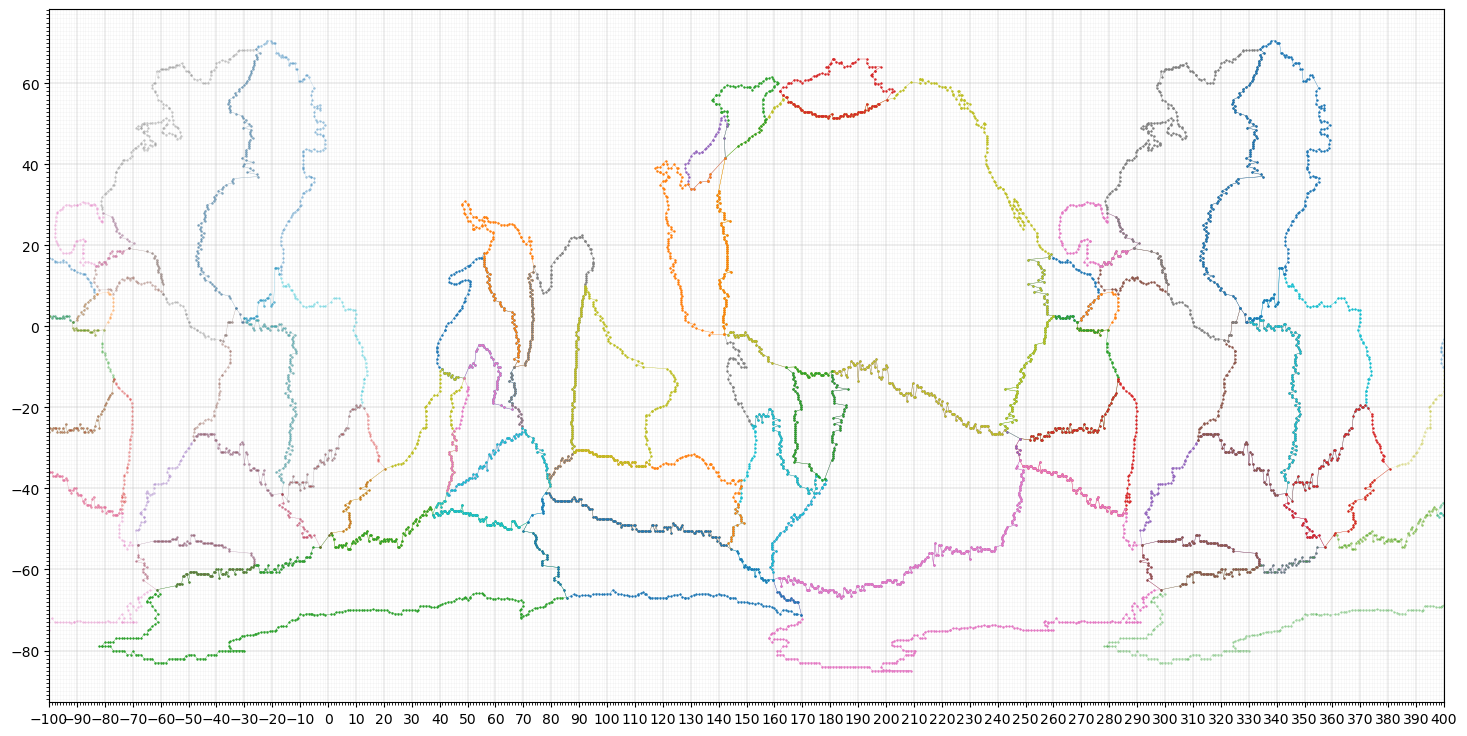

In [75]:
plt.figure(figsize=(18, 9))
ax = plt.subplot()
for b in region.Basins.values():
    l = plt.plot(np.append(b.lons, b.lons[0]), np.append(b.lats, b.lats[0]), "+-", markersize=1, lw=0.25)
    plt.plot(np.append(b.lons, b.lons[0])-360, np.append(b.lats, b.lats[0]), "+-", color=l[0].get_color(), markersize=1, lw=0.2, alpha=0.4)
    plt.plot(np.append(b.lons, b.lons[0])+360, np.append(b.lats, b.lats[0]), "+-", color=l[0].get_color(), markersize=1, lw=0.2, alpha=0.4)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(20))
plt.grid(True, alpha=0.25, which="major", lw=1.2)
plt.grid(True, alpha=0.1, which="minor", lw=0.5)
plt.xlim(-100, 400)

### Add basin boundaries for South and North Hemisphere continents (towards unique global coverage)

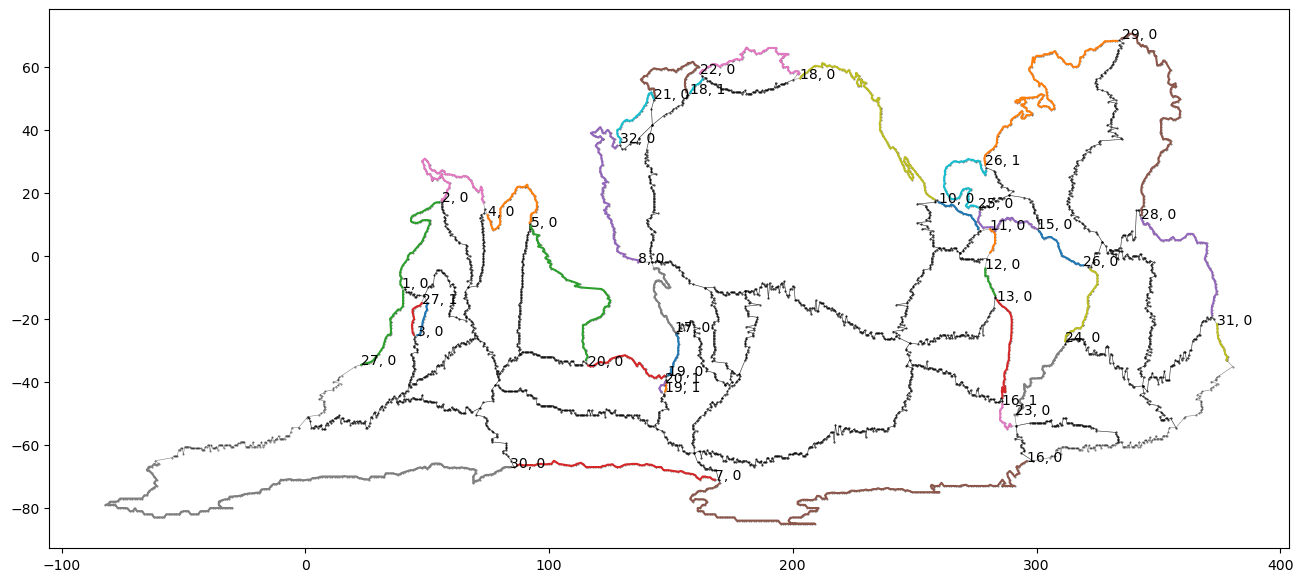

In [76]:
non_overlaps_dict = {}
plt.figure(figsize=(16, 7))
for b in region.Basins.values():
    plt.plot(np.append(b.lons, b.lons[0]), np.append(b.lats, b.lats[0]), "k.-", alpha=0.5, lw=0.4, markersize=1)
    
    overlap_list = [o for o in list(region.overlaps) if b.name in o]
    all_overlaps = np.unique([ooo for o in overlap_list for (onum, oo) in region.overlaps[o][b.name].items() for ooo in oo])
    non_overlaps = np.array([i for i in range(b.lons.size) if i not in all_overlaps])
    non_overlaps = reg.split_non_consecutive_list(non_overlaps, mod=b.lons.size)
    for i, no in enumerate(non_overlaps):
        non_overlaps_dict[(b.name, i)] = np.append(no[::-1], no[0]-1)
        plt.plot(b.lons[no], b.lats[no])
        plt.annotate(f"{b.name}, {i}", xy=(b.lons[no[-1]], b.lats[no[-1]]), xytext=(b.lons[no[-1]], b.lats[no[-1]]), textcoords="data")

In [77]:
# Add Northern Hemisphere Continent
NH_continent_non_overlaps = [
    ['27', 0], ['1', 0], ['2', 0], ['4', 0], ['5', 0], ['20', 0], ['19', 0], ['17', 0], ['8', 0], ['32', 0], ['21', 0], ['18', 1], ['22', 0], ['18', 0],
    ['10', 0], ['11', 0], ['12', 0], ['13', 0], ['16', 1], ['23', 0], ['24', 0], ['26', 0], ['15', 0], ['25', 0], ['26', 1], ['29', 0], ['28', 0], ['31', 0]
]
bname = '35'

lons = np.array([])
lats = np.array([])
for s in NH_continent_non_overlaps:
    lons = np.append(lons, region.Basins[s[0]].lons[non_overlaps_dict[(s[0], s[1])]])
    lats = np.append(lats, region.Basins[s[0]].lats[non_overlaps_dict[(s[0], s[1])]])
    
b = region.Basins[bname] = reg.Basin(lons, lats, bname, counterclockwise=True)

In [78]:
# Add Southern Hemisphere Continent
SH_continent_non_overlaps = [
    ['16', 0], ['7', 0], ['30', 0]
]
bname = '34'

lons = np.array([])
lats = np.array([])
for s in SH_continent_non_overlaps:
    lons = np.append(lons, region.Basins[s[0]].lons[non_overlaps_dict[(s[0], s[1])]])
    lats = np.append(lats, region.Basins[s[0]].lats[non_overlaps_dict[(s[0], s[1])]])
    
b = region.Basins[bname] = reg.Basin(lons, lats, bname, counterclockwise=True)

In [79]:
region.find_all_overlaps()

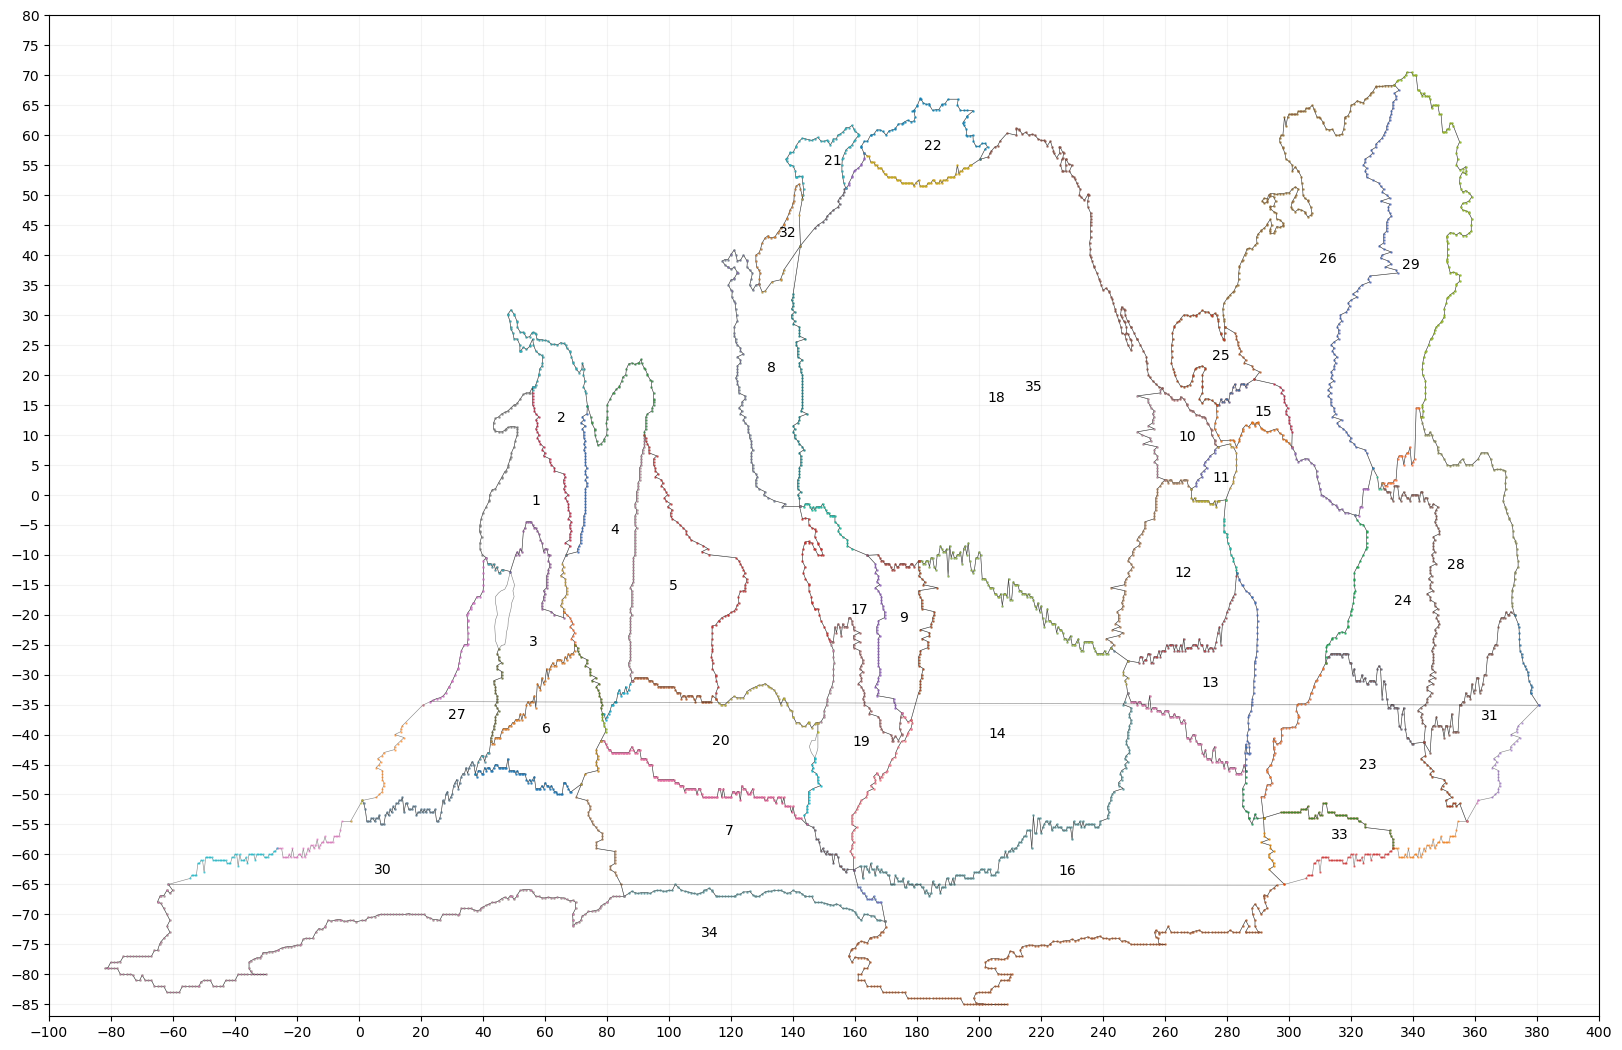

In [80]:
plt.figure(figsize=(20, 13))
for i, (bname, b) in enumerate(region.Basins.items()):
    plt.plot(
        np.append(b.lons, b.lons[0]),
        np.append(b.lats, b.lats[0]),
        alpha=0.5, lw=0.4, color="k"
    )
    
    plt.annotate(b.name, xy=(np.mean(b.lons), np.mean(b.lats)), xytext=(np.mean(b.lons), np.mean(b.lats)), textcoords="data")
    for (b1name, b2name), o in region.overlaps.items():
        if bname not in (b1name, b2name): continue
        for oo in o[bname].values():
            plt.plot(region.Basins[bname].lons[oo], region.Basins[bname].lats[oo], ".", alpha=0.5, markersize=1.5, lw=1)

plt.xlim(-100, 400)
plt.ylim(-87, 80);

plt.yticks(np.arange(-85, 85, 5))
plt.xticks(np.arange(-100, 410, 20))
plt.grid(True, alpha=0.15)

### Remove all points that do not lie on the overlapping boundaries of two or more regions

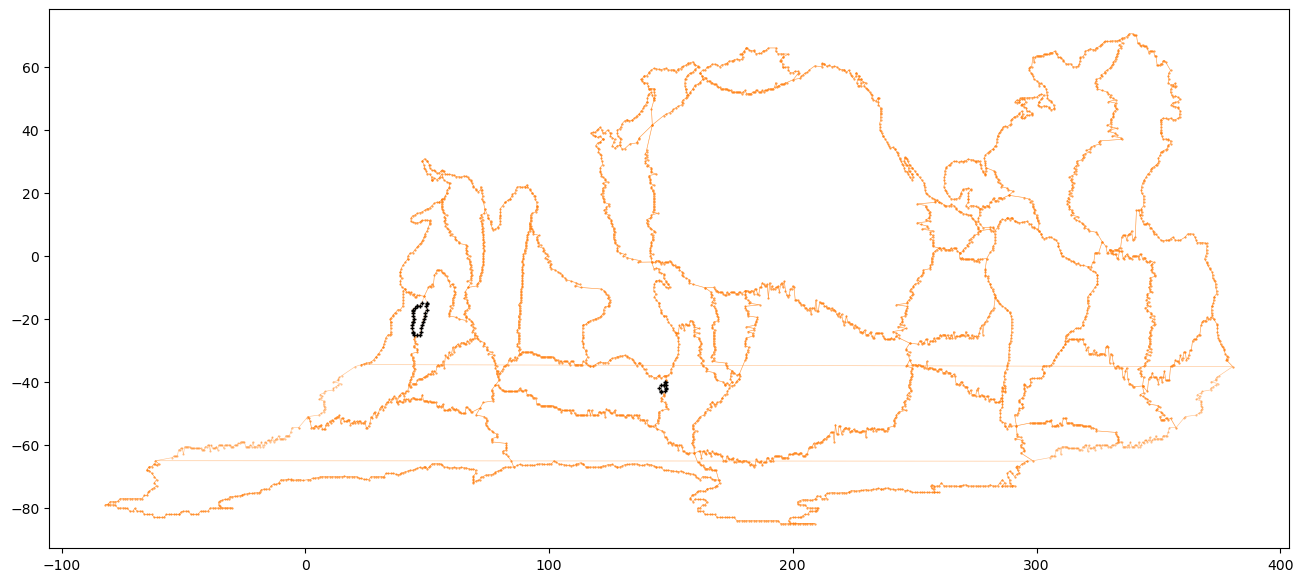

In [81]:
new_region = region.copy()

plt.figure(figsize=(16, 7))
for b in region.Basins.values():
    plt.plot(np.append(b.lons, b.lons[0]), np.append(b.lats, b.lats[0]), "C1.-", alpha=0.5, lw=0.4, markersize=1)
    
    overlap_list = [o for o in list(region.overlaps) if b.name in o]
    all_overlaps = np.unique([ooo for o in overlap_list for (onum, oo) in region.overlaps[o][b.name].items() for ooo in oo])
    non_overlaps = np.array([i for i in range(b.lons.size) if i not in all_overlaps])
    non_overlaps = reg.split_non_consecutive_list(non_overlaps, mod=b.lons.size)
    
    for i, no in enumerate(non_overlaps):
        plt.plot(b.lons[no], b.lats[no], "k+", markersize=3)
        new_region.Basins[b.name].lons[no] = np.nan
        new_region.Basins[b.name].lats[no] = np.nan
        
for b in new_region.Basins.values():
    b.lons = b.lons[~np.isnan(b.lons)]
    b.lats = b.lats[~np.isnan(b.lats)]
            
region = new_region.copy()

region.find_all_overlaps()

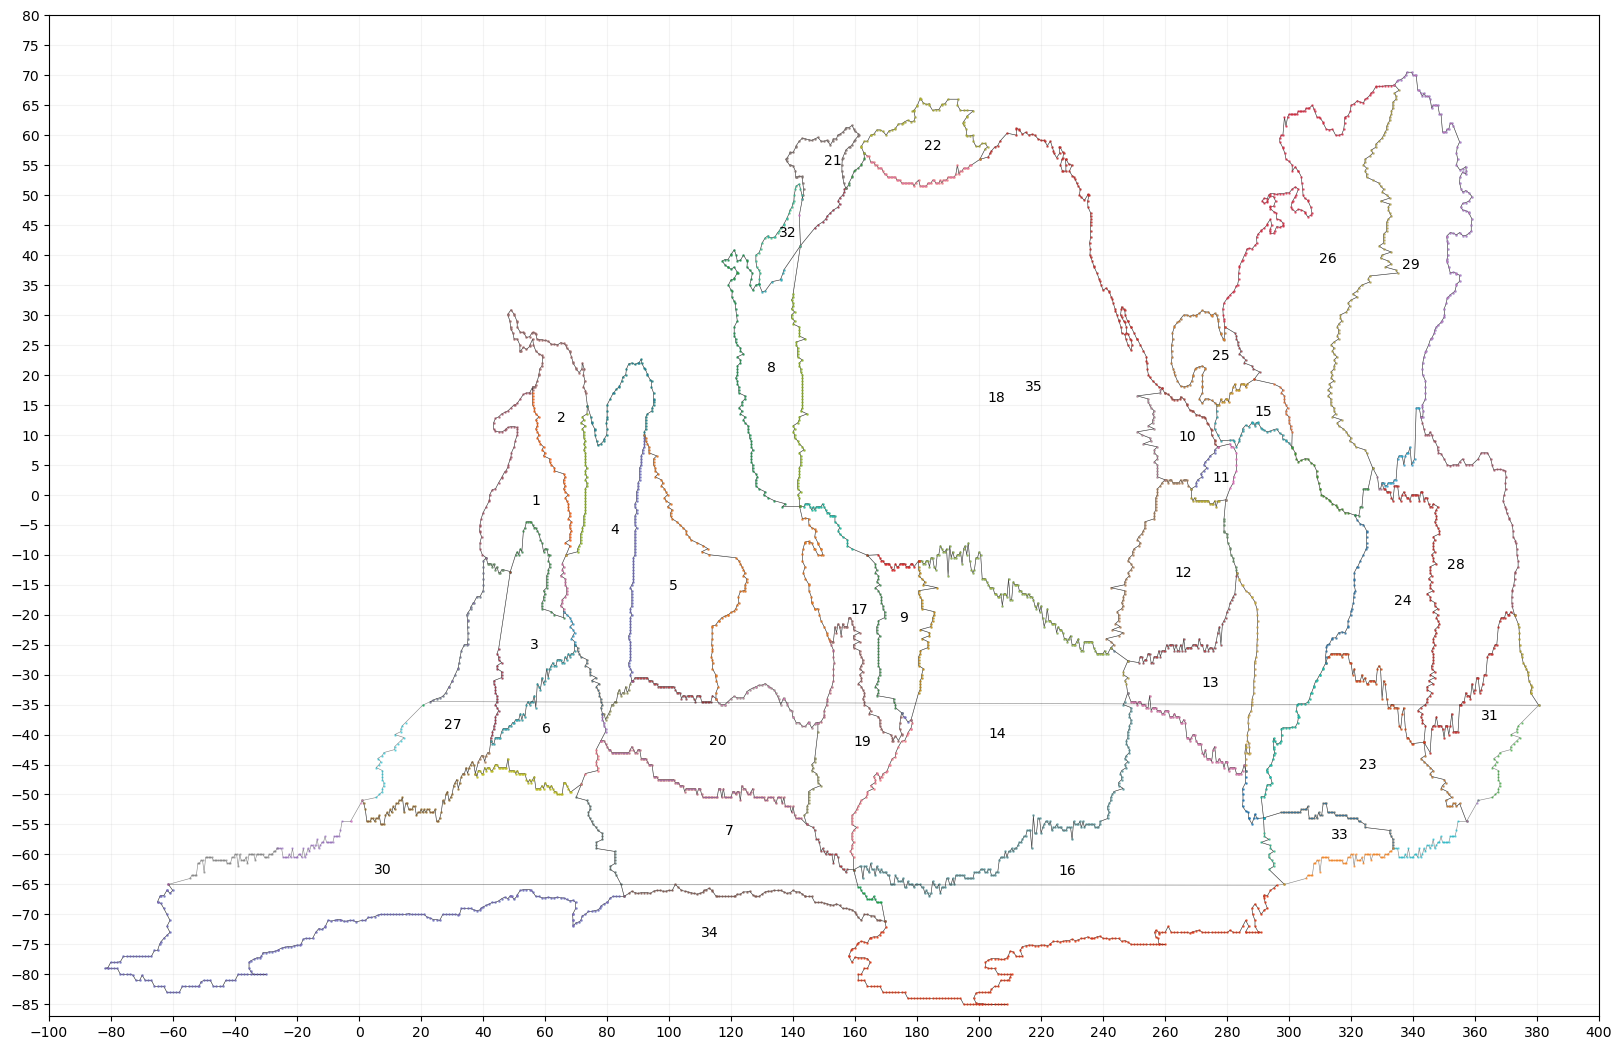

In [82]:
plt.figure(figsize=(20, 13))
for i, (bname, b) in enumerate(region.Basins.items()):
    plt.plot(
        np.append(b.lons, b.lons[0]),
        np.append(b.lats, b.lats[0]),
        alpha=0.5, lw=0.4, color="k"
    )
    
    plt.annotate(b.name, xy=(np.mean(b.lons), np.mean(b.lats)), xytext=(np.mean(b.lons), np.mean(b.lats)), textcoords="data")
    for (b1name, b2name), o in region.overlaps.items():
        if bname not in (b1name, b2name): continue
        for oo in o[bname].values():
            plt.plot(region.Basins[bname].lons[oo], region.Basins[bname].lats[oo], ".", alpha=0.5, markersize=1.5, lw=1)

plt.yticks(np.arange(-85, 85, 5))
plt.xticks(np.arange(-100, 410, 20))
plt.xlim(-100, 400)
plt.ylim(-87, 80);
plt.grid(True, alpha=0.15)

### Save output in exact same format I received it in

In [83]:
clean_basins = [{'bsn': np.array([b.lons, b.lats]), 'bsn_num':bname} for (bname, b) in region.Basins.items()]
for b in range(len(clean_basins)):
    if len(clean_basins[b]['bsn_num']) == 1:
        clean_basins[b]['bsn_num'] = clean_basins[b]['bsn_num']+"_"

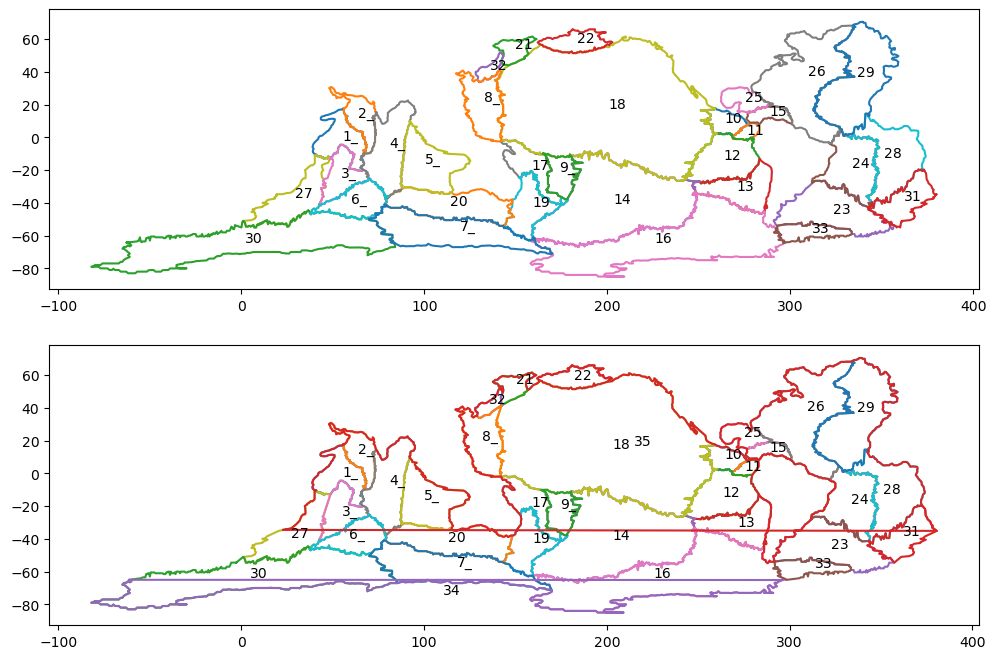

In [84]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
for b in basins:
    plt.plot(np.append(b['bsn'][0,:], b['bsn'][0,:][0]), np.append(b['bsn'][1,:], b['bsn'][1,:][0]))
    plt.annotate(b['bsn_num'], xy=(np.nanmean(b['bsn'][0,:]), np.nanmean(b['bsn'][1,:])), xytext=(np.nanmean(b['bsn'][0,:]), np.nanmean(b['bsn'][1,:])), textcoords="data")

plt.subplot(2,1,2)
for b in clean_basins:
    plt.plot(np.append(b['bsn'][0,:], b['bsn'][0,:][0]), np.append(b['bsn'][1,:], b['bsn'][1,:][0]))
    plt.annotate(b['bsn_num'], xy=(np.mean(b['bsn'][0,:]), np.mean(b['bsn'][1,:])), xytext=(np.mean(b['bsn'][0,:]), np.mean(b['bsn'][1,:])), textcoords="data")

In [85]:
scipy.io.savemat('data/boundaries/PJ2010_abyssal_basin_boundaries.mat', {'bsn_only':clean_basins})